# Uso de librerías para obtener datos de balances mediante API

Importamos la librería para hacer los requests http

In [2]:
import requests

Definimos una función que toma de argumento el ticker(identificador de la empresa en la bolsa) y me trae los datos del perfil de la misma 

In [3]:
def getProfile(symbol):
    apikey = 'demo' 
    url = 'http://fmpcloud.io/api/v3/profile/'+symbol
    p = {'apikey':apikey}
    r = requests.get(url, params = p)
    js = r.json()
    return js

In [4]:
getProfile('AAPL')

[{'symbol': 'AAPL',
  'price': 150.965,
  'beta': 1.222222,
  'volAvg': 75978245,
  'mktCap': 2476792086528,
  'lastDiv': 0.865,
  'range': '112.59-157.26',
  'changes': -0.31500244,
  'companyName': 'Apple Inc.',
  'currency': 'USD',
  'cik': '0000320193',
  'isin': 'US0378331005',
  'cusip': '037833100',
  'exchange': 'Nasdaq Global Select',
  'exchangeShortName': 'NASDAQ',
  'industry': 'Consumer Electronics',
  'website': 'http://www.apple.com',
  'description': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store se

# Hoja de Balance

In [5]:
import pandas as pd
def balanceSheet(symbol, period):
    apikey = 'demo'
    period = 'FY'
    url = 'http://fmpcloud.io/api/v3/balance-sheet-statement/'+symbol
    p = {'apikey':apikey}
    r = requests.get(url, params = p)
    js = r.json()
    df = pd.DataFrame(js)
    return df

bs = balanceSheet('AAPL', 'annual')
bs.columns

Index(['date', 'symbol', 'cik', 'reportedCurrency', 'fillingDate',
       'acceptedDate', 'calendarYear', 'period', 'cashAndCashEquivalents',
       'shortTermInvestments', 'cashAndShortTermInvestments', 'netReceivables',
       'inventory', 'otherCurrentAssets', 'totalCurrentAssets',
       'propertyPlantEquipmentNet', 'goodwill', 'intangibleAssets',
       'goodwillAndIntangibleAssets', 'longTermInvestments', 'taxAssets',
       'otherNonCurrentAssets', 'totalNonCurrentAssets', 'otherAssets',
       'totalAssets', 'accountPayables', 'shortTermDebt', 'taxPayables',
       'deferredRevenue', 'otherCurrentLiabilities', 'totalCurrentLiabilities',
       'longTermDebt', 'deferredRevenueNonCurrent',
       'deferredTaxLiabilitiesNonCurrent', 'otherNonCurrentLiabilities',
       'totalNonCurrentLiabilities', 'otherLiabilities', 'totalLiabilities',
       'commonStock', 'retainedEarnings',
       'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockhol

In [22]:
def balanceSheetG(symbol, period):
    apikey = 'demo'
    period = 'FY'
    url = 'https://fmpcloud.io/api/v3/balance-sheet-statement-growth/'+symbol
    p = {'apikey':apikey, 'period':period}
    r = requests.get(url, params = p)
    js = r.json()
    df = pd.Dataframe(js)
    return df

bs = balanceSheet('AAPL', 'quarter')
acotado =  bs.loc[0].drop(['cik','date', 'symbol', 'period', 'reportedCurrency', 'fillingDate', 'acceptedDate', 'link', 'finalLink'])
print(ultimo)

calendarYear                                       2021
cashAndCashEquivalents                      34940000000
shortTermInvestments                         2.7699e+10
cashAndShortTermInvestments                 62639000000
netReceivables                              51506000000
inventory                                    6580000000
otherCurrentAssets                          14111000000
totalCurrentAssets                         134836000000
propertyPlantEquipmentNet                   39440000000
goodwill                                              0
intangibleAssets                                      0
goodwillAndIntangibleAssets                           0
longTermInvestments                         1.27877e+11
taxAssets                                             0
otherNonCurrentAssets                       48849000000
totalNonCurrentAssets                      216166000000
otherAssets                                           0
totalAssets                                35100

<AxesSubplot:>

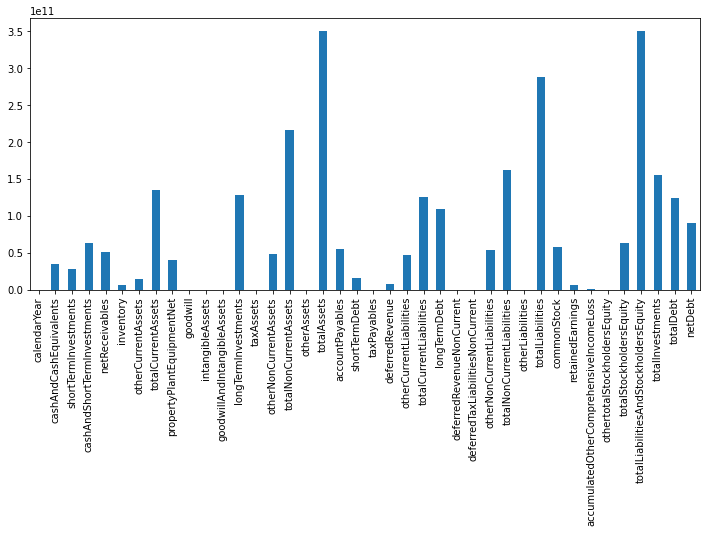

In [23]:
acotadoDF = acotado.astype(float)
acotadoDF.plot(kind = 'bar', figsize = (12,5))